In [2]:
import Pkg
Pkg.add("Distributions")
Pkg.add("StatsPlots")
using Distributions, StatsPlots;

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
p_survive = 2^(-1/(30.17*365))

0.999937057553667

In [4]:
p_survive_approx = 0.9999371

0.9999371

In [5]:
p_decay_approx = 1 - p_survive_approx

6.289999999997686e-5

A single atom decays on a given day with a probability of about 0.00629%; `X ~ Ber(0.0000629)`.

To model the behaviour of 10^6 atoms, we can take 10^6 independent random variables that behave like `X`.
Equivalently, `Y ~ Bin(10^6, 0.0000629)`.

In [6]:
myBinomial = Binomial(10^6, p_decay_approx) 

Binomial{Float64}(n=1000000, p=6.289999999997686e-5)

We can now ask the `rand` function to draw according to the above distribution.

In [7]:
mySimulation = rand(myBinomial, 10^3);

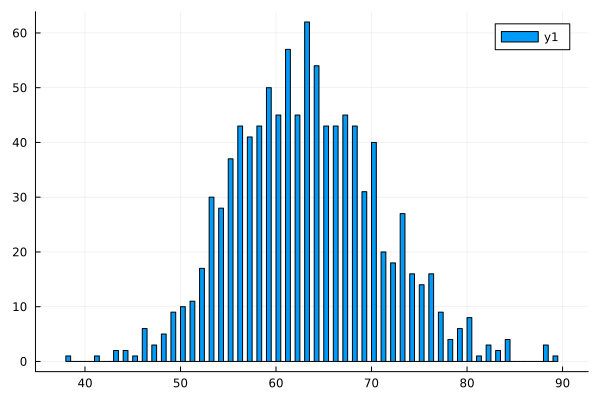

In [8]:
histogram(mySimulation, nbins=100)

The normalized version of the graph is more useful for comparison with the Poisson distribution.

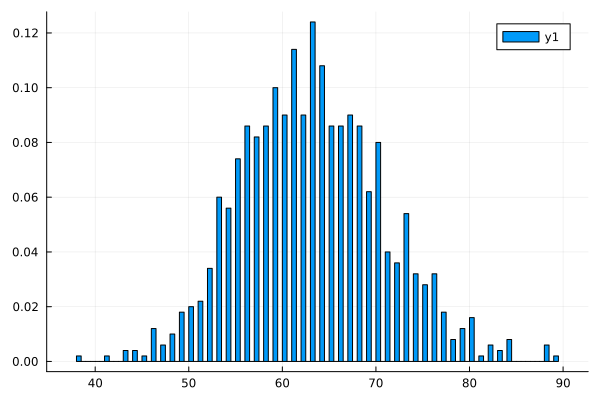

In [9]:
histogram(mySimulation, nbins=100, normed=true)

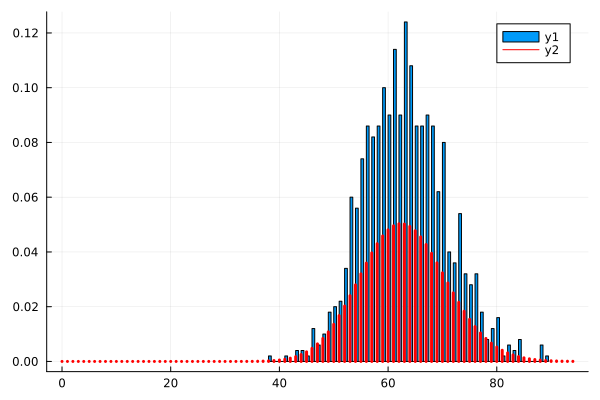

In [10]:
plot!(Poisson(10^6*p_decay_approx), color=:red, linewidth=3)